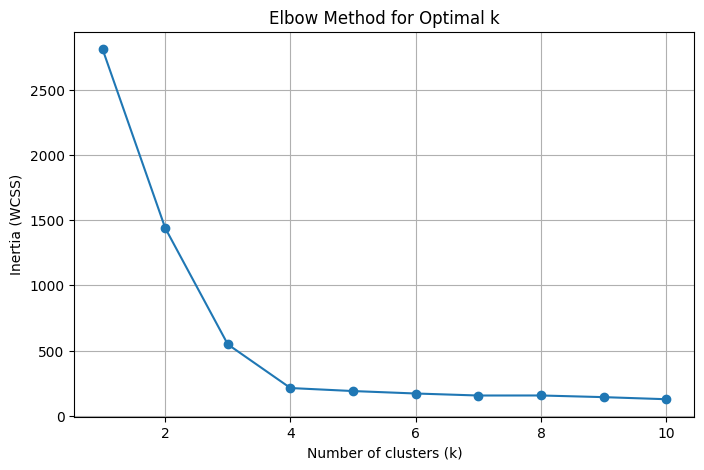

Accuracy: 100.00%


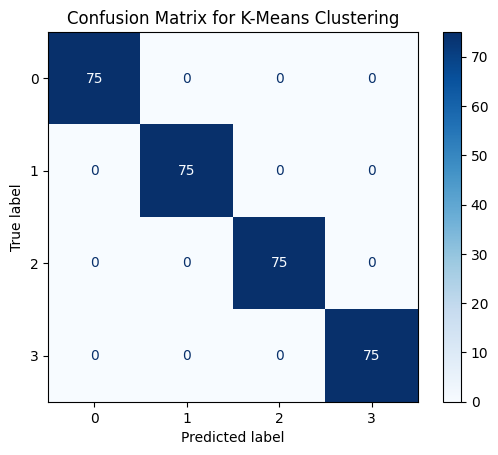

In [4]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import mode
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import make_blobs
# Initialize a synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


# TODO determine the best k for k-means
# Step 2: Fit K-Means for different k values and calculate inertia (WCSS)
wcss = []
k_range = range(1, 11)  # Try k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 3: Plot Inertia vs. k (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()
    
# TODO calculate accuracy for best K    
# Step 4: Choose the best k (from the Elbow, let's say k = 4)
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Relabel the clusters to match the true labels using mode
labels = np.zeros_like(y_kmeans)
for i in range(best_k):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]

# Step 6: Calculate accuracy
accuracy = accuracy_score(y_true, labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


# TODO draw a confusion matrix

# Step 7: Create and plot the confusion matrix
cm = confusion_matrix(y_true, labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

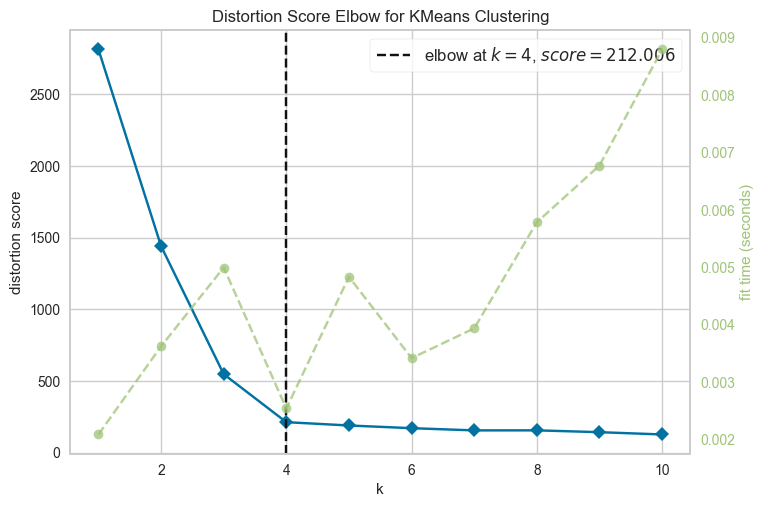

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Step 1: Create synthetic data using make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Create a KMeans model
kmeans = KMeans(random_state=42)

# Step 3: Use KElbowVisualizer to find the optimal k
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the visualizer to the data and display the plot
visualizer.fit(X)
visualizer.show()
